In [233]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib as plt

In [234]:
dataset = pd.read_csv("H:/QSpiders/2. Logistic Regression/adult.data.csv")

In [235]:
dataset.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [236]:
dataset.shape

(32561, 15)

In [237]:
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [238]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [239]:
dataset.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

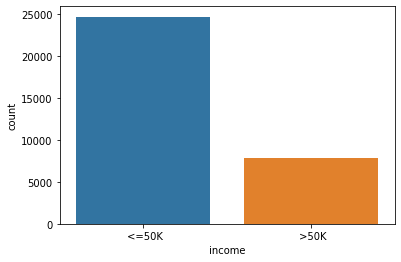

In [240]:
sns.countplot(x='income',data=dataset)

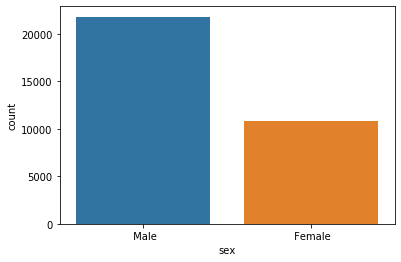

In [241]:
sns.countplot(x='sex',data=dataset)

In [242]:
dataset.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [243]:
dataset.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [244]:
dataset.marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [245]:
dataset.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [246]:
dataset.relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [247]:
dataset.race.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [248]:
dataset.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [249]:
dataset.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [250]:
dataset.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [251]:
label_encoder = LabelEncoder()
dataset.income = label_encoder.fit_transform(dataset.income.values)
dataset.education = label_encoder.fit_transform(dataset.education.values)
dataset.native_country = label_encoder.fit_transform(dataset.native_country.values)

In [252]:
dataset['income'].unique()

array([0, 1], dtype=int64)

In [253]:
list(label_encoder.inverse_transform([0,1]))

[' ?', ' Cambodia']

In [254]:
dataset = pd.get_dummies(dataset, columns=[
    "workclass", "marital_status", "occupation", "relationship", "race", "sex"
])

In [255]:
dataset.shape

(32561, 53)

In [256]:
dataset.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [257]:
X = dataset.drop("income", axis=1)
y = dataset["income"]

In [258]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=50)

In [259]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

c:\users\rangu\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [260]:
y_pred_train_pred = log_reg.predict(X_train)

In [261]:
y_pred = log_reg.predict(X_test)

In [262]:
from sklearn.metrics import accuracy_score
print('Training Accuracy: ',accuracy_score(y_train, y_pred_train_pred))
print('Testing Accuracy: ',accuracy_score(y_test, y_pred))

Training Accuracy:  0.7983502983502984
Testing Accuracy:  0.8003889855665882


In [263]:
from sklearn.metrics import classification_report

In [264]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7389
           1       0.72      0.29      0.42      2380

    accuracy                           0.80      9769
   macro avg       0.77      0.63      0.65      9769
weighted avg       0.79      0.80      0.77      9769



In [265]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

No handles with labels found to put in legend.


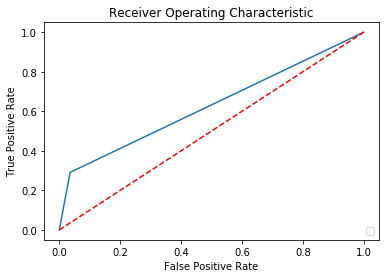

In [266]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [267]:
probability = log_reg.predict_proba(X_test)

In [268]:
probability

array([[0.83470137, 0.16529863],
       [0.00962963, 0.99037037],
       [0.80715973, 0.19284027],
       ...,
       [0.82990985, 0.17009015],
       [0.80597816, 0.19402184],
       [0.79263588, 0.20736412]])

In [269]:
#######################

In [270]:
dataset_test = pd.read_csv("H:/QSpiders/2. Logistic Regression/adult_data_test.csv")

In [271]:
dataset_test.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [272]:
id_test=dataset_test["id"]
dataset_test=dataset_test.drop("id",axis=1)

In [273]:
label_encoder = LabelEncoder()
dataset_test.education = label_encoder.fit_transform(dataset_test.education.values)
dataset_test.native_country = label_encoder.fit_transform(dataset_test.native_country.values)

In [274]:
dataset_test = pd.get_dummies(dataset_test, columns=[
    "workclass", "marital_status", "occupation", "relationship", "race", "sex"
])

In [275]:
y_pred_test = log_reg.predict(dataset_test)

In [276]:
output = pd.DataFrame({'id': id_test, 'income_predictions': y_pred_test})

output.to_csv('H:/QSpiders/2. Logistic Regression/adult_income_results.csv', index=False)